In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',delim_whitespace=True, header=None)

In [3]:
df.columns = ['existing_checkout', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_acc', 'employment', 'installment_rate', 'gender', 'other_debtors', 'residence_since', 'property', 'age', 'installment_plan', 'housing', 'existing_credits', 'job', 'liabilities', 'telephone', 'foreign_worker', 'risk']

In [4]:
df.head()

,existing_checkout,duration,credit_history,purpose,credit_amount,savings_acc,employment,installment_rate,gender,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,liabilities,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
exicheck_category = ['Little', 'Moderate', 'Rich', 'None']
df['existing_checkout'] = df['existing_checkout'].replace(['A11', 'A12', 'A13', 'A14'], exicheck_category)

credhist_category = ['None', 'Paid at this Bank', 'Paid Duly', 'Delay in Past', 'Existing Credits']
df['credit_history'] = df['credit_history'].replace(['A30','A31', 'A32', 'A33', 'A34'], credhist_category)

In [6]:
purpose_category = ['New Car', 'Used Car', 'Furniture', 'Radio/TV', 'Appliances','Repairs','Education','Vacation',
                    'Retraining','Business','Others']
df['purpose'] = df['purpose'].replace(['A40','A41', 'A42', 'A43', 'A344','A45','A46','A47',
                                       'A48','A49','A410'], purpose_category)

In [7]:
sacc_category = ['Little','Moderate','Quite Rich', 'Rich','None']
df['savings_acc'] = df['savings_acc'].replace(['A61','A62','A63','A64','A65'], sacc_category)

emp_category = ['Unemployed','Less than 1 year','1 to 4 years','4 to 7 years', 'More than 7 years']
df['employment'] = df['employment'].replace(['A71','A72','A73','A74','A75'], emp_category)

In [8]:
sex_cat = ['Male', 'Female', 'Male', 'Male', 'Female']
df['gender'] = df['gender'].replace(['A91','A92','A93','A94','A95'], sex_cat)

debt_cat = ['None','Co-applicant', 'Guarantor']
df['other_debtors'] = df['other_debtors'].replace(['A101','A102','A103'], debt_cat)

prop_cat = ['Real Estate','Life Insurance', 'Car/Other', 'Unknown/No Property']
df['property'] = df['property'].replace(['A121','A122','A123','A124'], prop_cat)

In [9]:
ip_cat = ['Bank','Stores', 'None']
df['installment_plan'] = df['installment_plan'].replace(['A141','A142','A143'], ip_cat)

h_cat = ['Rent', 'Own', 'Free']
df['housing'] = df['housing'].replace(['A151','A152','A153'], h_cat)

job_category = ['Unskilled Non-resident', 'Unskilled Resident', 'Skilled', 'Highly Skilled']
df['job'] = df['job'].replace(['A171', 'A172', 'A173', 'A174'], job_category)

t_cat = ['None', 'Yes']
df['telephone'] = df['telephone'].replace(['A191','A192'],t_cat)

fw_cat = ['Yes', 'No']
df['foreign_worker'] = df['foreign_worker'].replace(['A201','A202'], fw_cat)

risk_cat = ['Good', 'Bad']
df['risk'] = df['risk'].replace([1, 2], risk_cat)

In [10]:
df.head()

,existing_checkout,duration,credit_history,purpose,credit_amount,savings_acc,employment,installment_rate,gender,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,liabilities,telephone,foreign_worker,risk
0,Little,6,Existing Credits,Radio/TV,1169,None,More than 7 years,4,Male,None,...,Real Estate,67,None,Own,2,Skilled,1,Yes,Yes,Good
1,Moderate,48,Paid Duly,Radio/TV,5951,Little,1 to 4 years,2,Female,None,...,Real Estate,22,None,Own,1,Skilled,1,None,Yes,Bad
2,None,12,Existing Credits,Education,2096,Little,4 to 7 years,2,Male,None,...,Real Estate,49,None,Own,1,Unskilled Resident,2,None,Yes,Good
3,Little,42,Paid Duly,Furniture,7882,Little,4 to 7 years,2,Male,Guarantor,...,Life Insurance,45,None,Free,1,Skilled,2,None,Yes,Good
4,Little,24,Delay in Past,New Car,4870,Little,1 to 4 years,3,Male,None,...,Unknown/No Property,53,None,Free,2,Skilled,2,None,Yes,Bad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   existing_checkout  1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   savings_acc        1000 non-null   object
 6   employment         1000 non-null   object
 7   installment_rate   1000 non-null   int64 
 8   gender             1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residence_since    1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  installment_plan   1000 non-null   object
 14  housing            1000 non-null   object
 15  existing_credits   1000 non-null   int64 
 16  job                1000 non-null   object
 

In [12]:
df.shape

(1000, 21)

In [13]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,liabilities
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
df.nunique()

existing_checkout      4
duration              33
credit_history         5
purpose               10
credit_amount        921
savings_acc            5
employment             5
installment_rate       4
gender                 2
other_debtors          3
residence_since        4
property               4
age                   53
installment_plan       3
housing                3
existing_credits       4
job                    4
liabilities            2
telephone              2
foreign_worker         2
risk                   2
dtype: int64

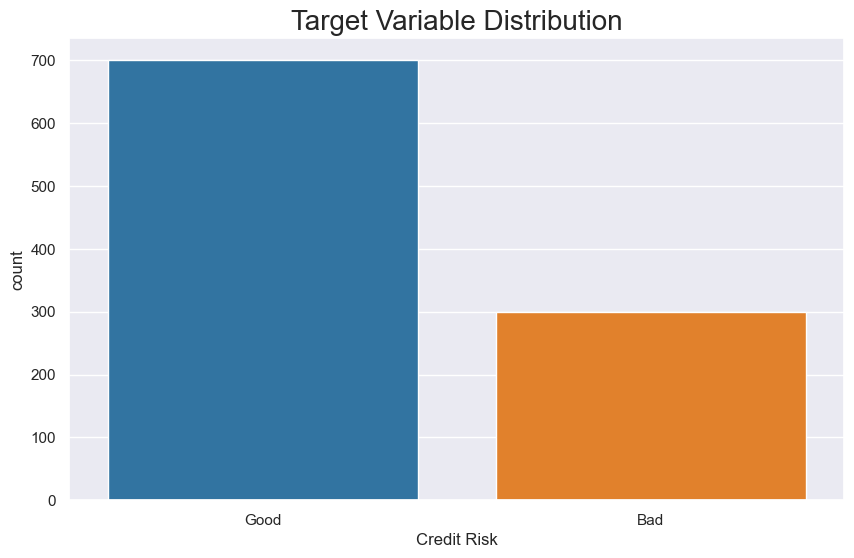

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="risk", palette = 'tab10')
plt.title("Target Variable Distribution", fontsize=20)
plt.xlabel('Credit Risk')
plt.show()

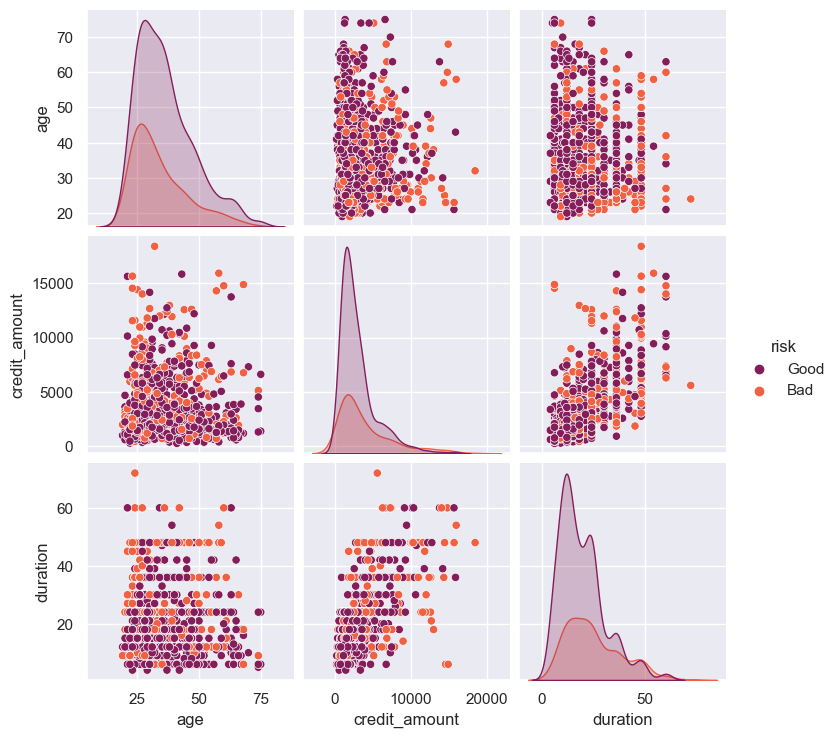

In [63]:
num_cat_risk = ['age', 'credit_amount', 'duration', 'risk']
sns.pairplot(df[num_cat_risk], hue="risk", palette='rocket')
plt.show()

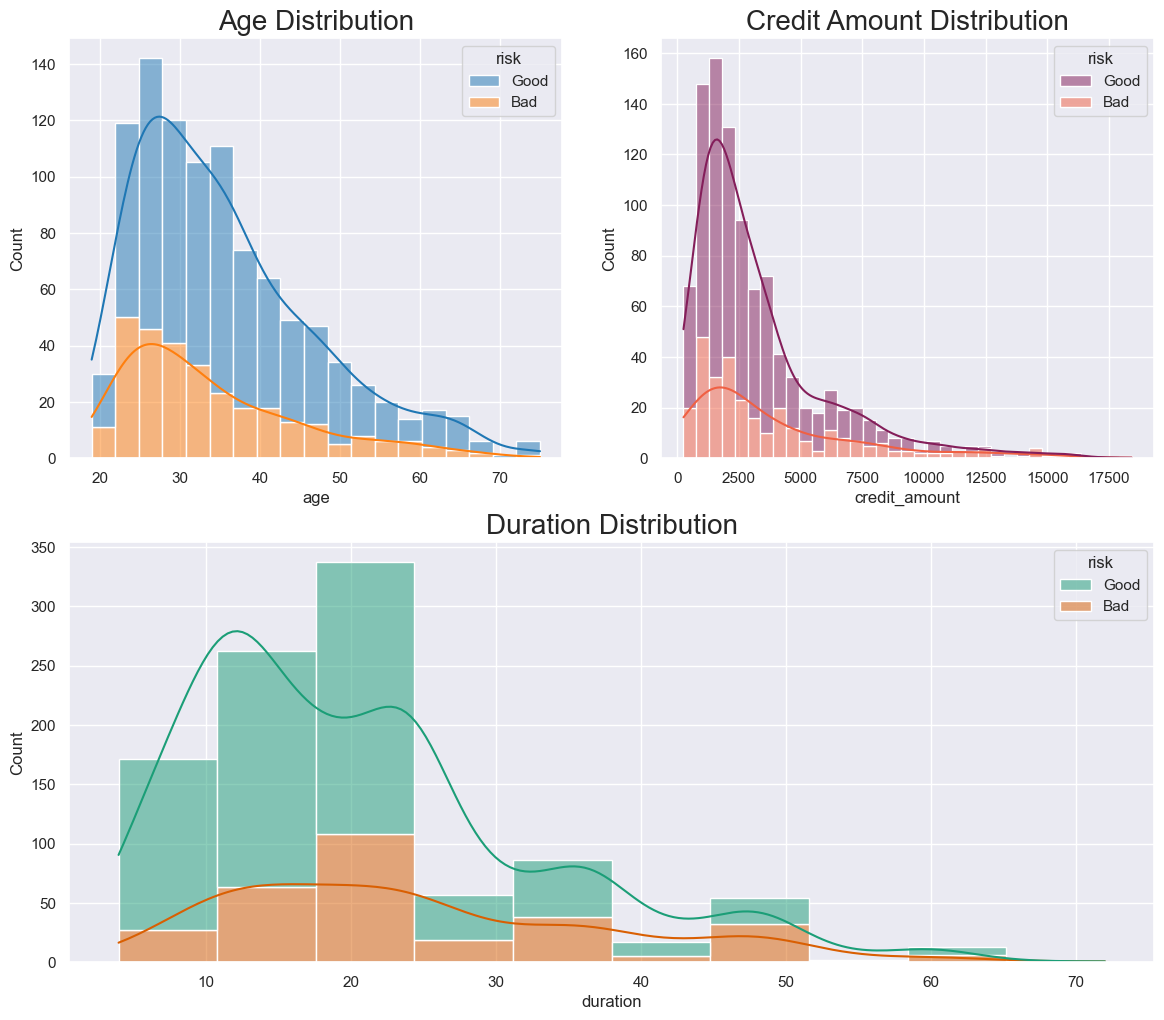

In [64]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=df, x='age', hue='risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=df, x='credit_amount', hue='risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=df, x='duration', hue='risk', multiple='stack', palette='Dark2', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)


plt.show()

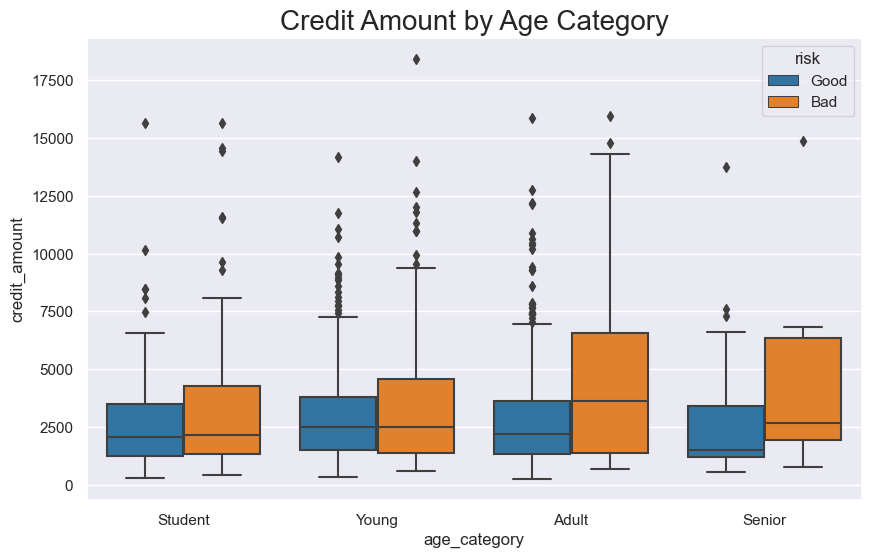

In [65]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["age_category"] = pd.cut(df.age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sns.boxplot(data=df, x='age_category', y='credit_amount', hue='risk', palette='tab10')
plt.show()

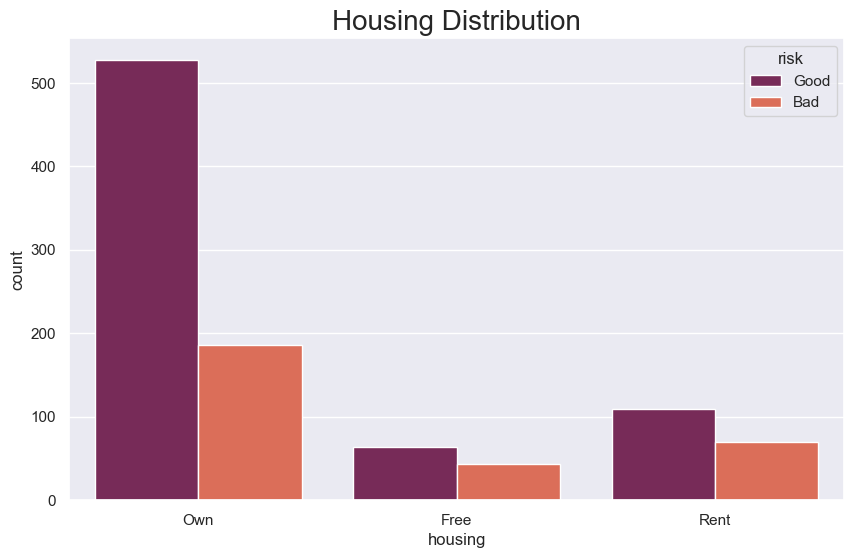

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='housing', hue='risk', palette='rocket')
plt.title("Housing Distribution", fontsize=20)
plt.show()

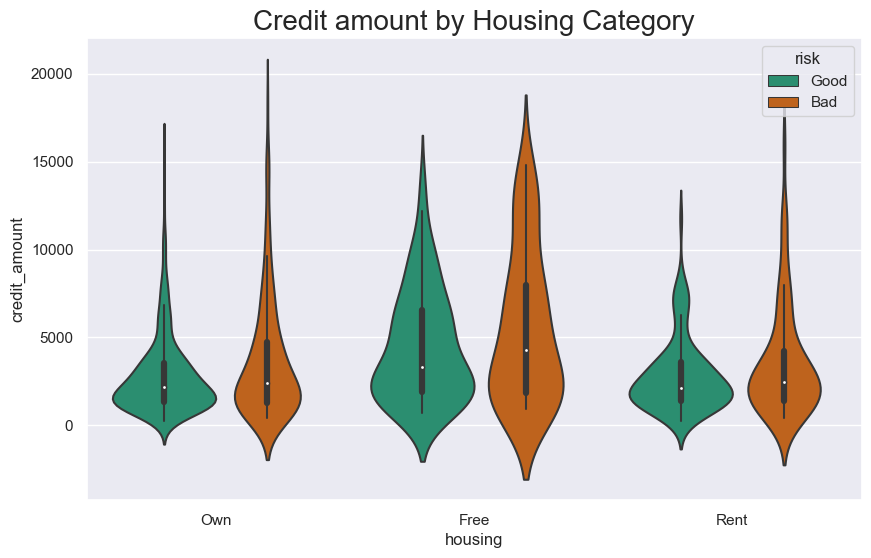

In [67]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='housing', y='credit_amount', hue='risk', palette='Dark2')
plt.title("Credit amount by Housing Category", fontsize=20)
plt.show()

Text(0.5, 0, '')

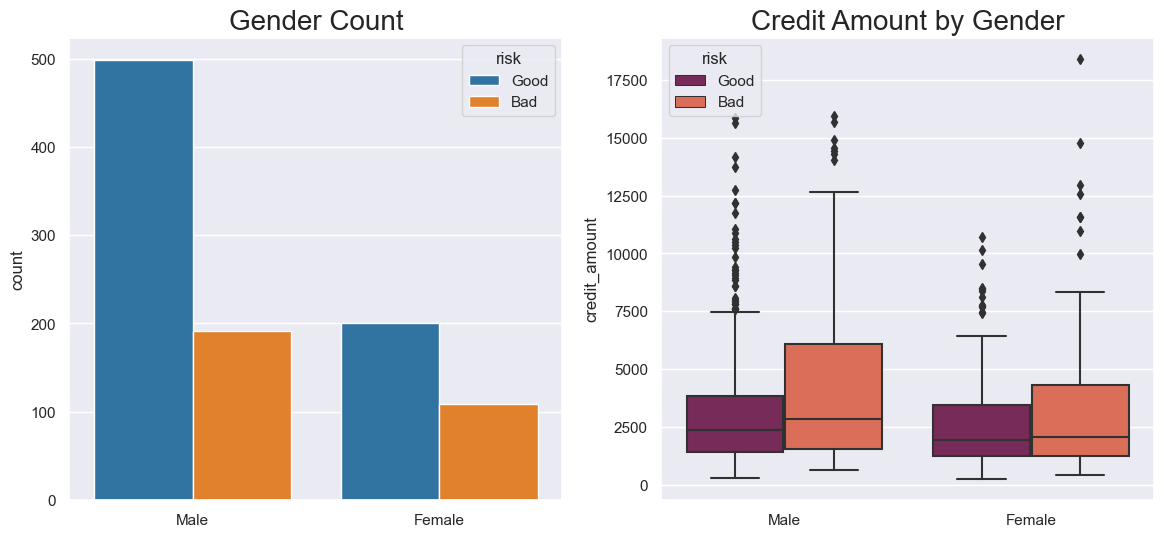

In [68]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
ax1 = sns.countplot(data=df, x='gender', hue='risk', palette='tab10')
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")

plt.subplot(122)
ax2 = sns.boxplot(data=df, x='gender', y='credit_amount', palette='rocket', hue='risk')
ax2.set_title("Credit Amount by Gender", fontsize=20)
ax2.set_xlabel("")

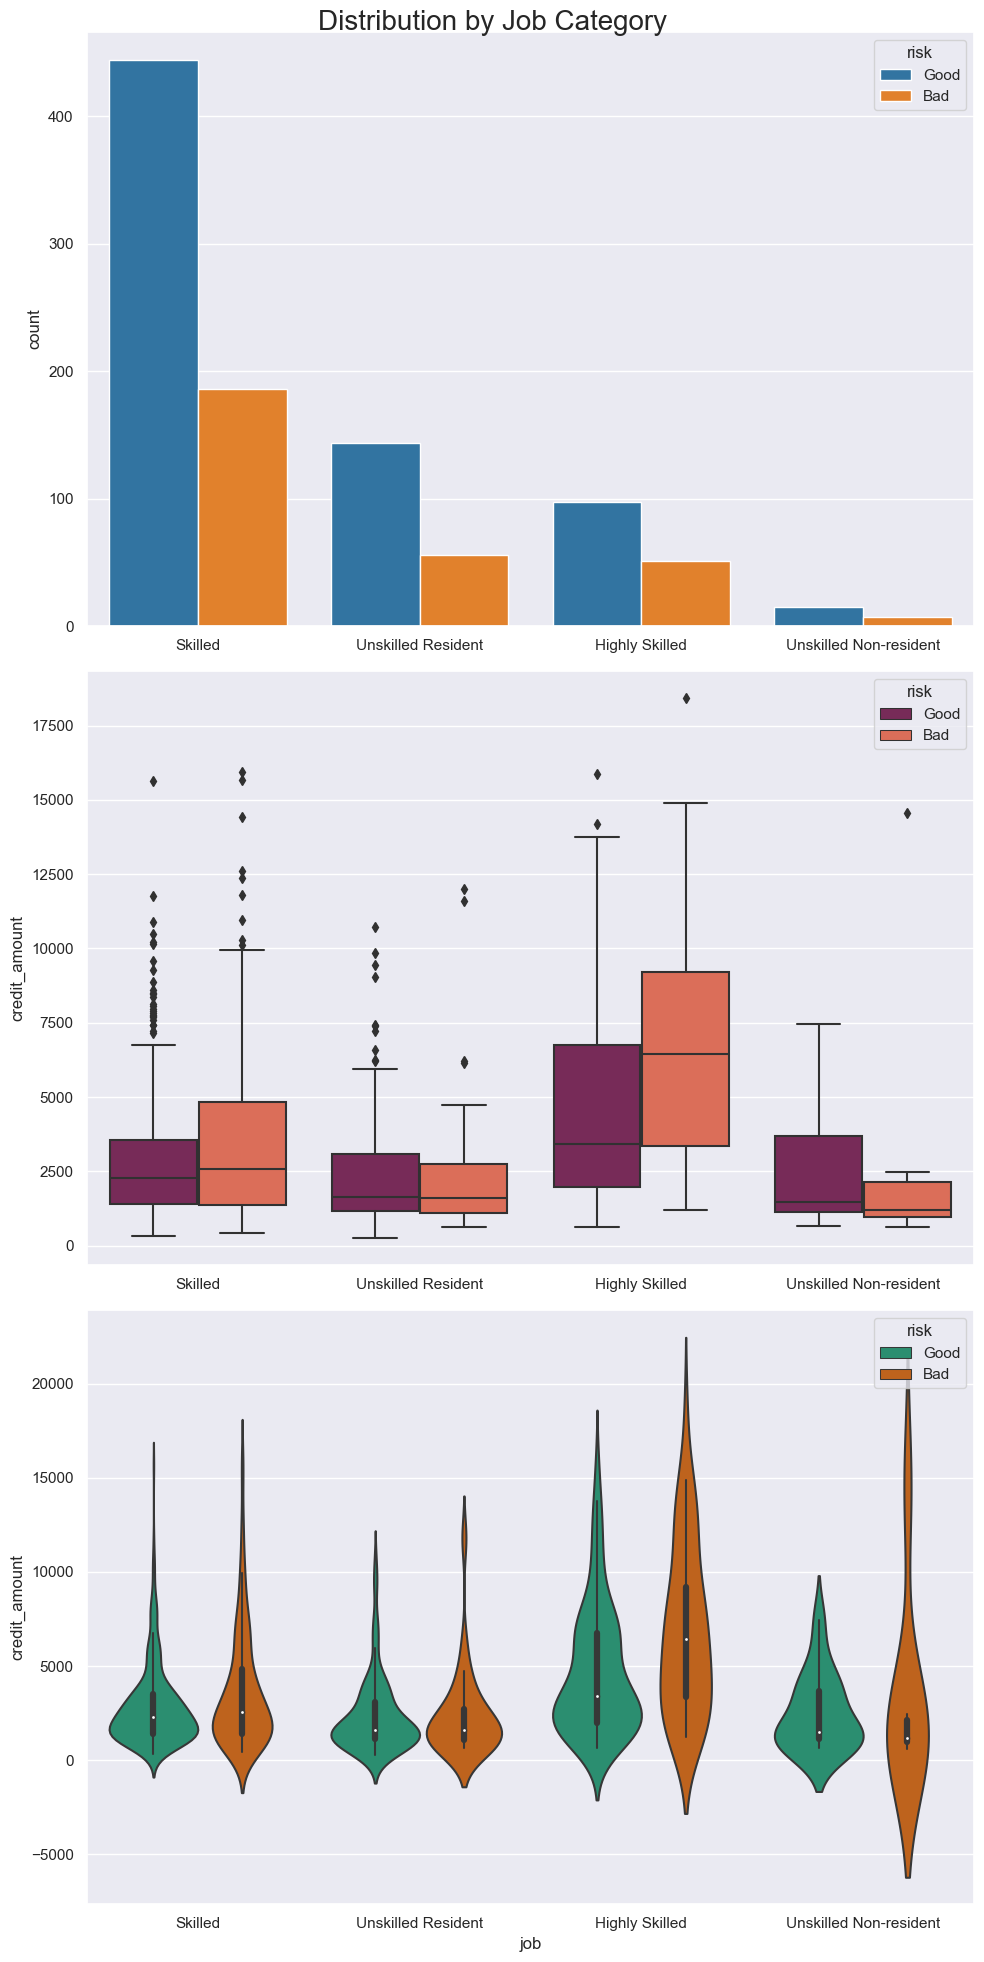

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle("Distribution by Job Category", fontsize=20)
sns.countplot(data=df, x='job', hue='risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.boxplot(data=df, x='job', y='credit_amount', palette='rocket', hue='risk', ax=ax2)
ax2.set_xlabel("")

sns.violinplot(data=df, x='job', y='credit_amount', palette='Dark2', hue='risk', ax=ax3)
fig.tight_layout()
plt.show()

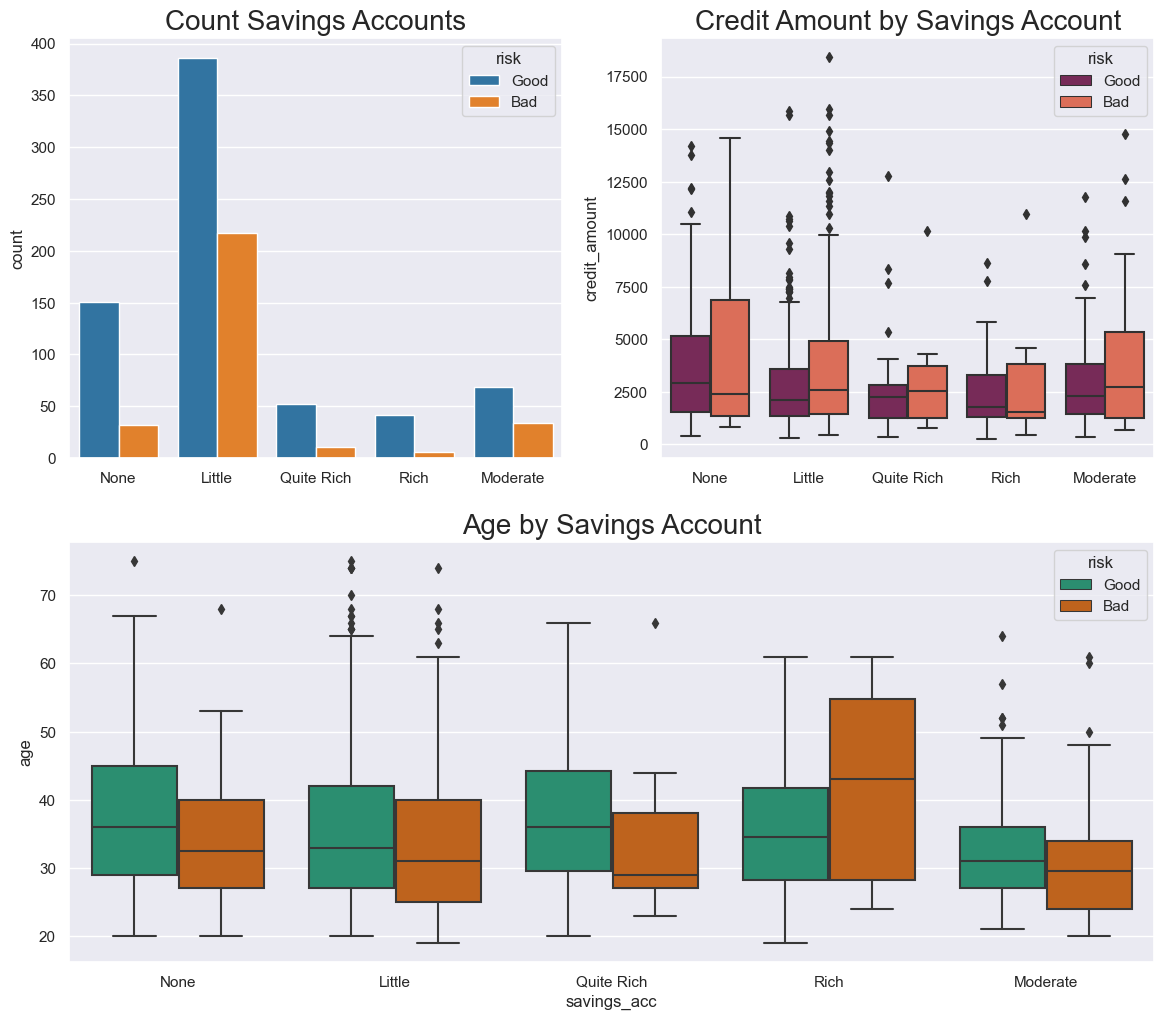

In [70]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='savings_acc', hue='risk', palette='tab10')
ax1.set_title("Count Savings Accounts", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='savings_acc', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Savings Account", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='savings_acc', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Savings Account", fontsize=20)

plt.show()

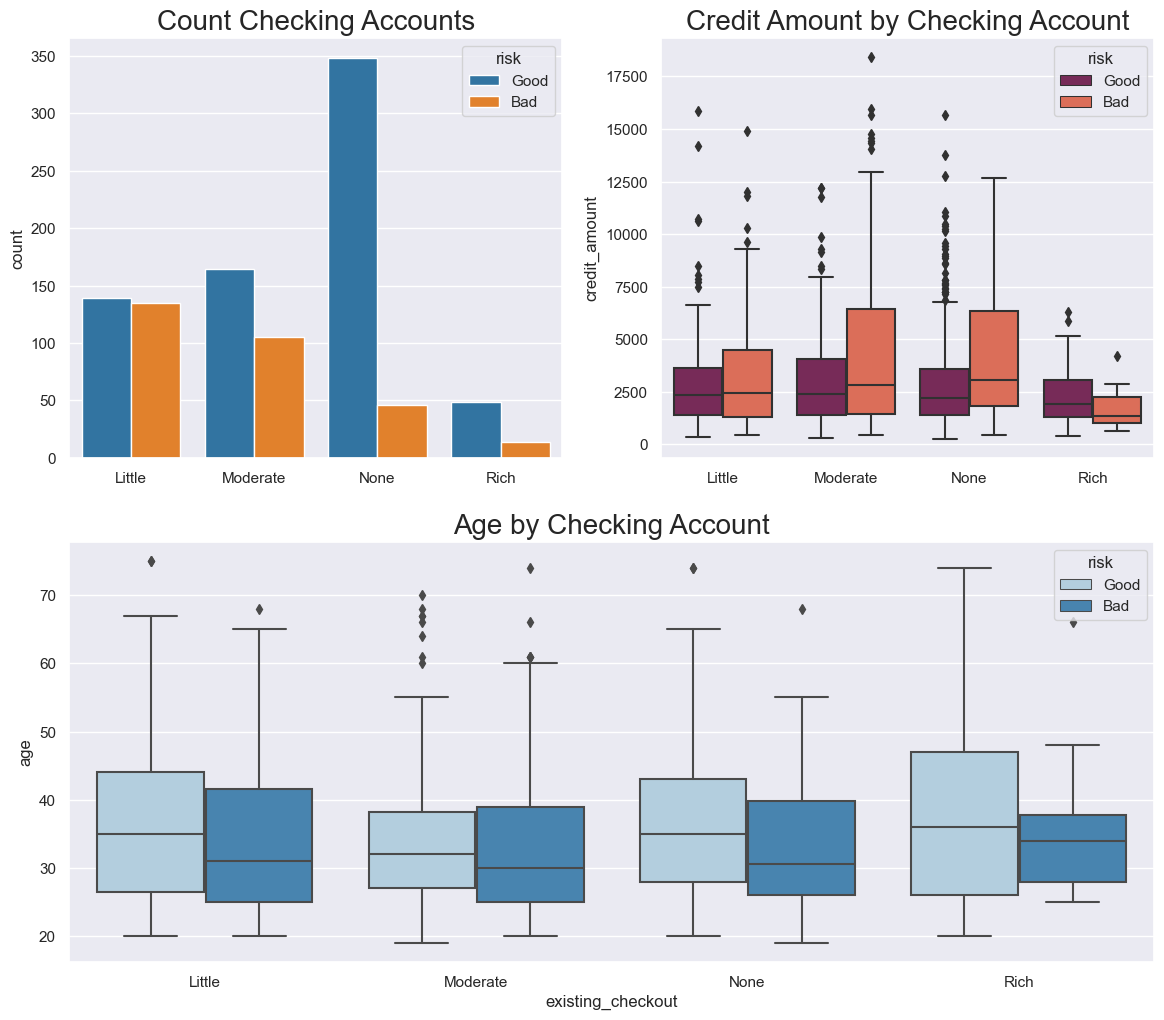

In [25]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='existing_checkout', hue='risk', palette='tab10')
ax1.set_title("Count Checking Accounts", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='existing_checkout', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Checking Account", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='existing_checkout', y='age', hue='risk', palette='Blues')
ax3.set_title("Age by Checking Account", fontsize=20)

plt.show()

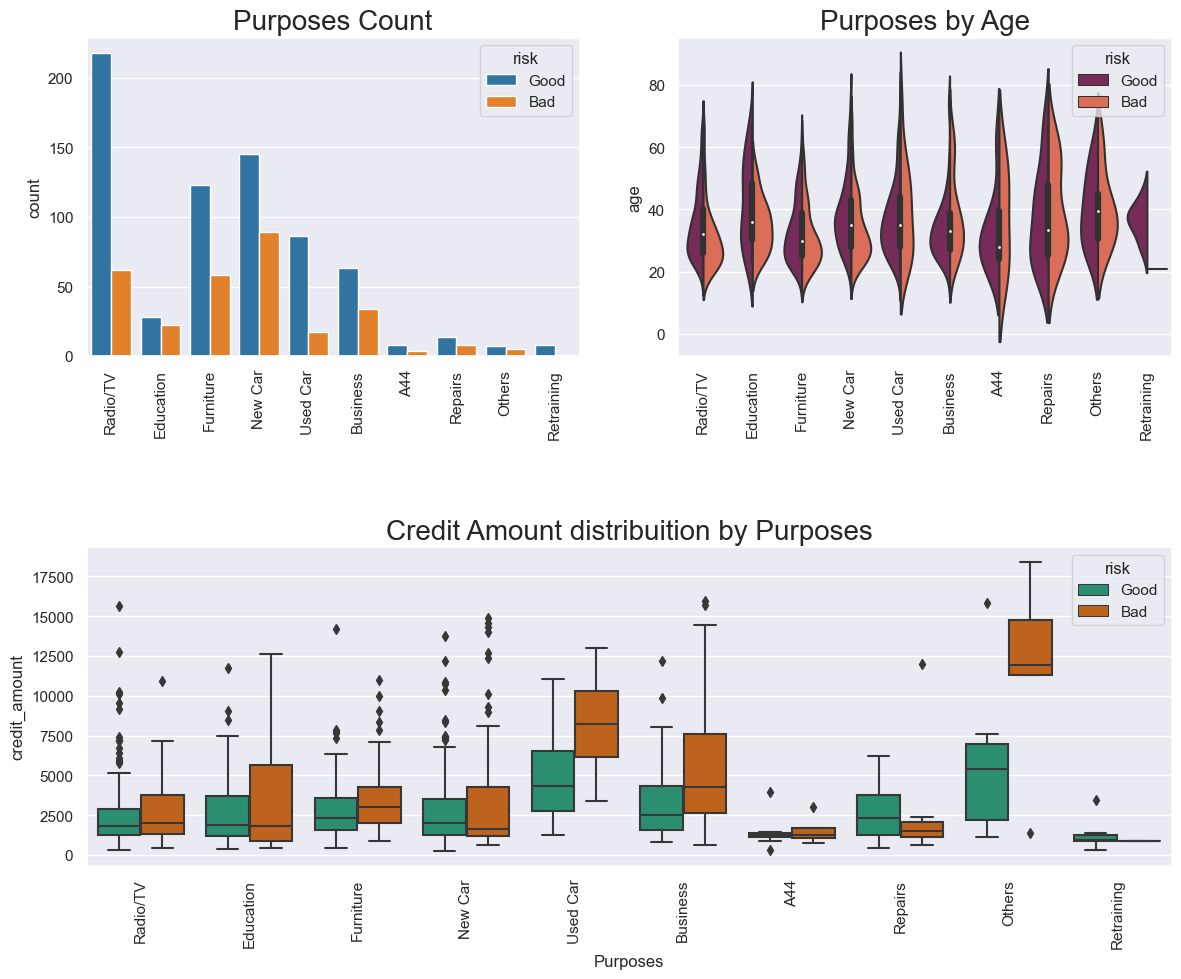

In [71]:
plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.countplot(data=df, x="purpose", palette="tab10", hue = "risk")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel("")
ax1.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
ax2 = sns.violinplot(data=df, x="purpose", y="age", palette="rocket", hue = "risk",split=True)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_xlabel("")
ax2.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
ax3 = sns.boxplot(data=df, x="purpose", y="credit_amount", palette="Dark2", hue = "risk")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax3.set_xlabel("Purposes")
ax3.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

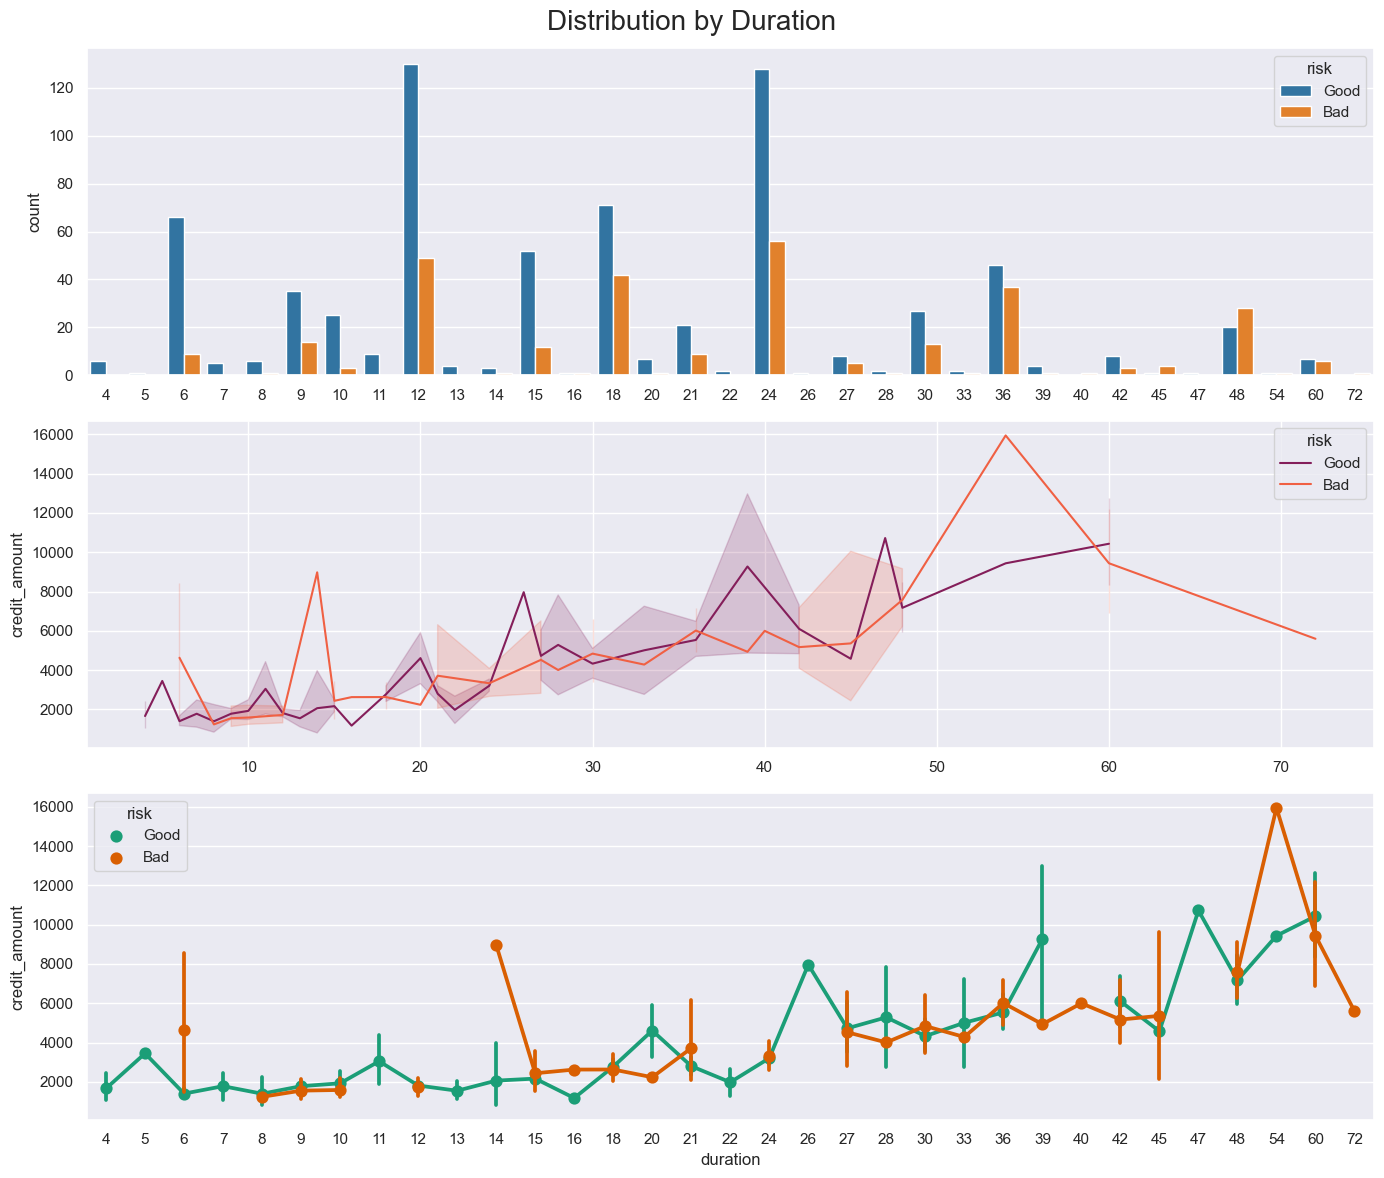

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle("Distribution by Duration", fontsize=20)
sns.countplot(data=df, x='duration', hue='risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.lineplot(data=df, x='duration', y='credit_amount', hue='risk', palette='rocket', ax=ax2)
ax2.set_xlabel("")

sns.pointplot(data=df, x='duration', y='credit_amount', hue='risk', palette='Dark2', ax=ax3)
fig.tight_layout()
plt.show()

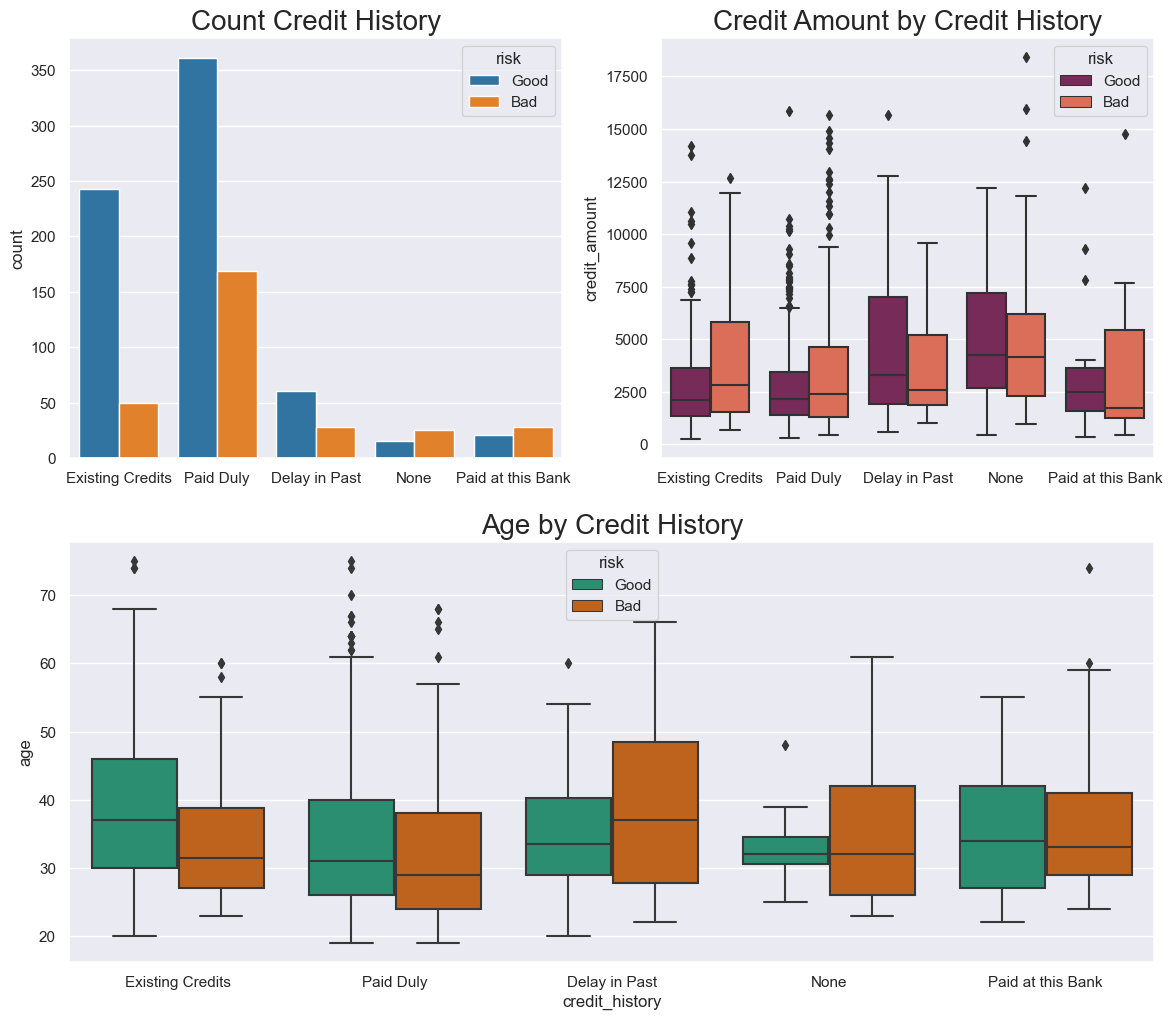

In [75]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='credit_history', hue='risk', palette='tab10')
ax1.set_title("Count Credit History", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='credit_history', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Credit History", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='credit_history', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Credit History", fontsize=20)

plt.show()

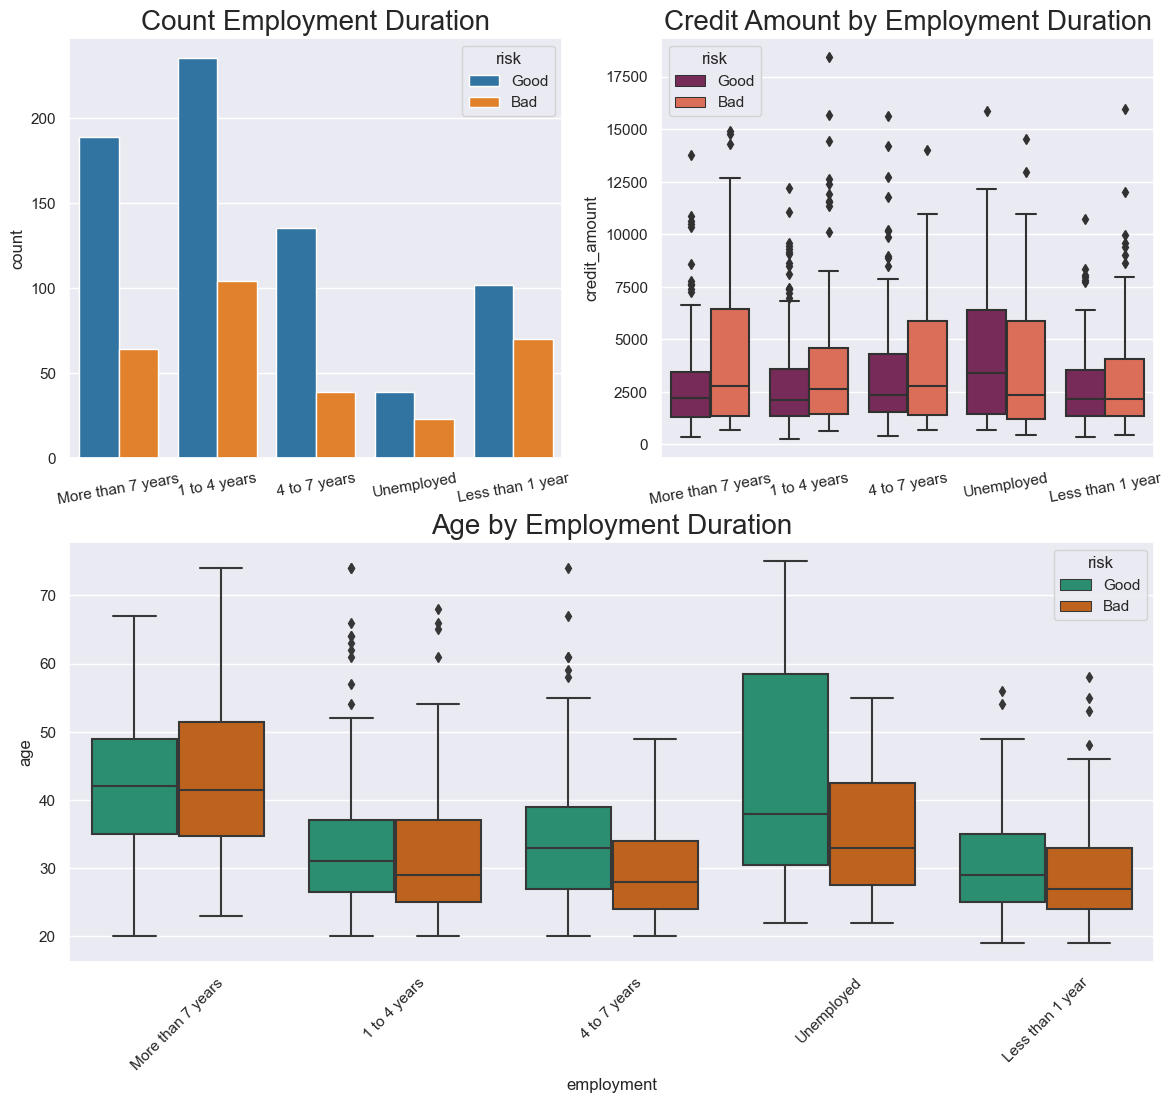

In [80]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='employment', hue='risk', palette='tab10')
ax1.set_title("Count Employment Duration", fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='employment', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Employment Duration", fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='employment', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Employment Duration", fontsize=20)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)

plt.show()

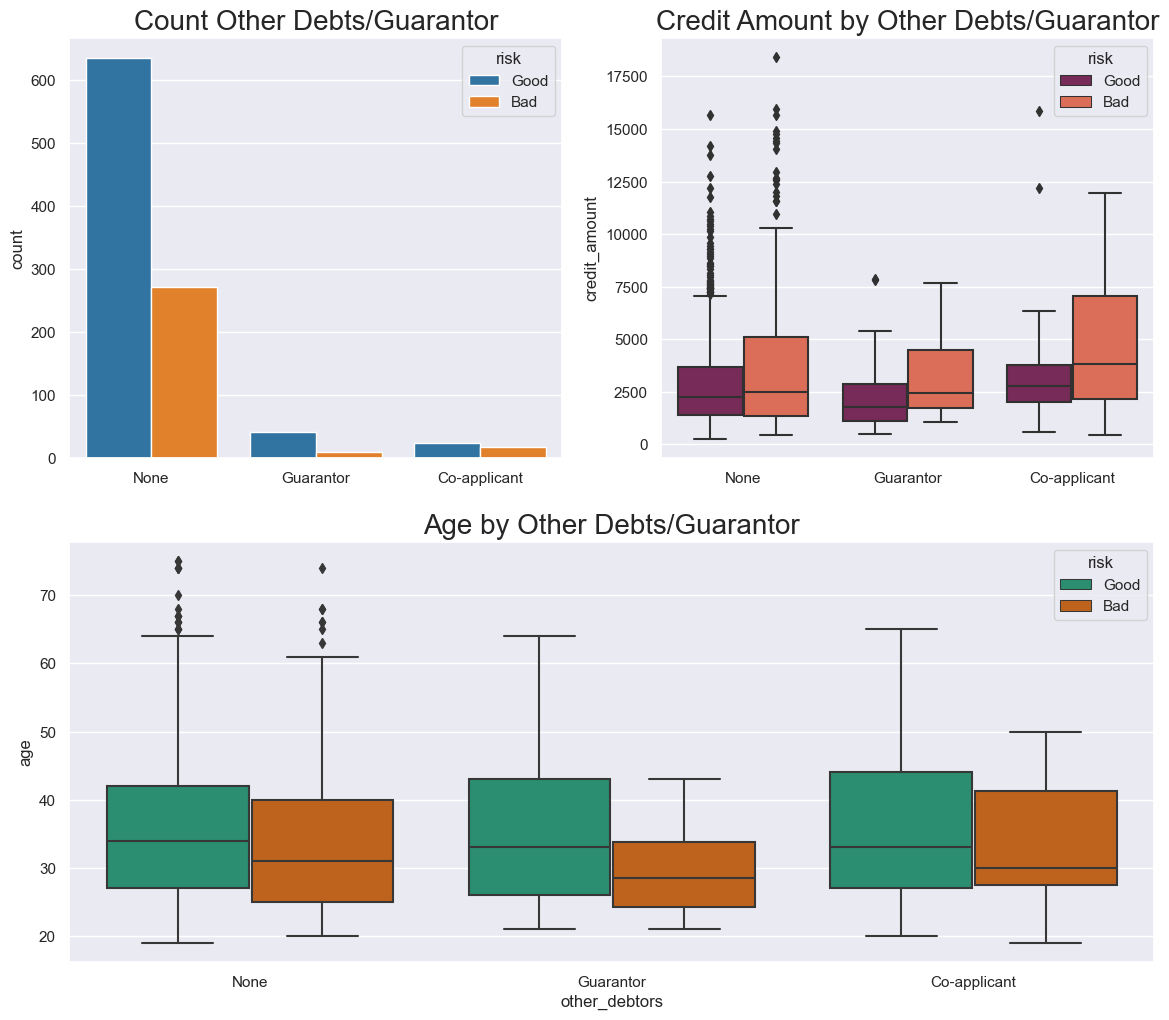

In [81]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='other_debtors', hue='risk', palette='tab10')
ax1.set_title("Count Other Debts/Guarantor", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='other_debtors', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Other Debts/Guarantor", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='other_debtors', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Other Debts/Guarantor", fontsize=20)

plt.show()

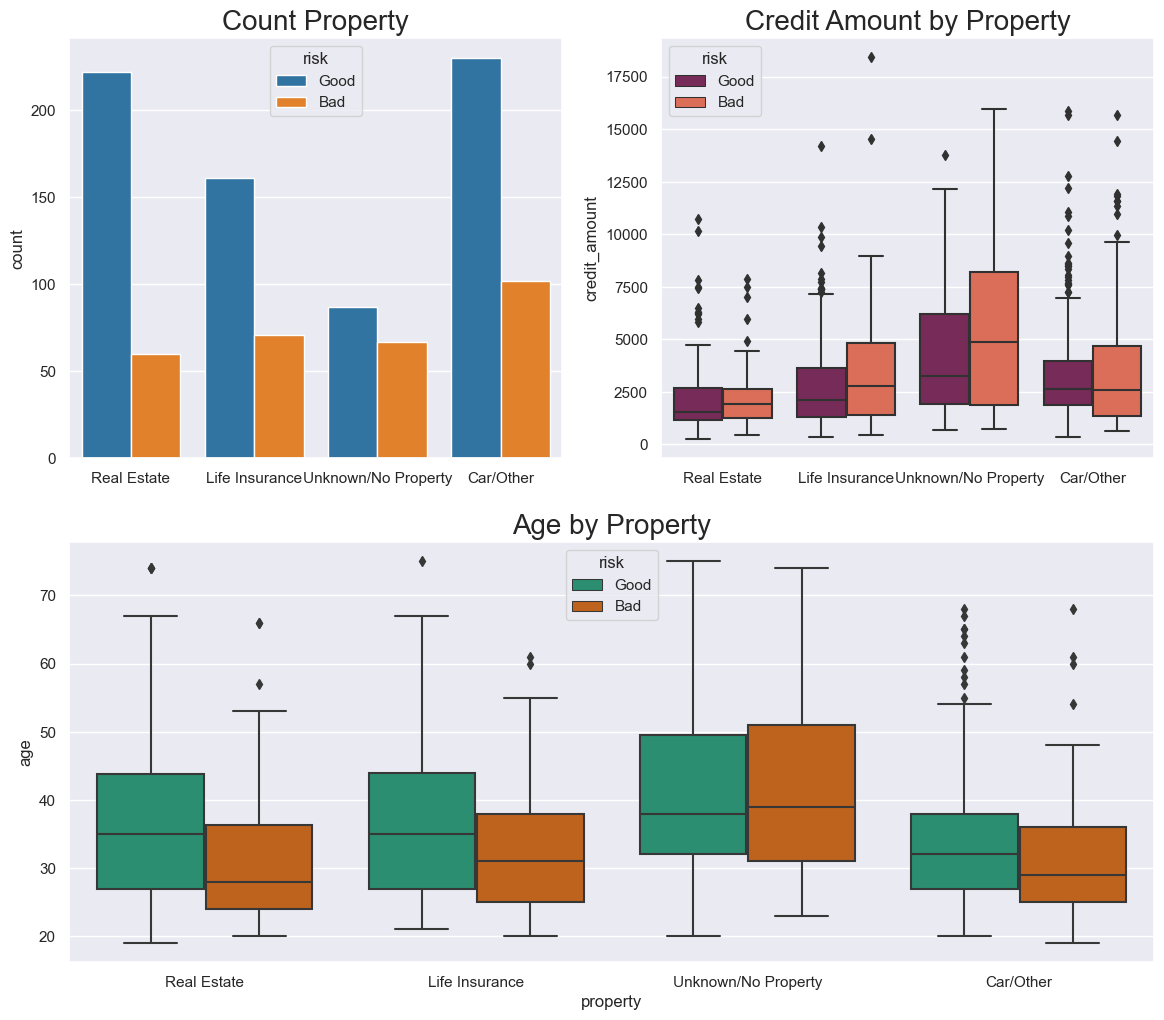

In [82]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='property', hue='risk', palette='tab10')
ax1.set_title("Count Property", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='property', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Property", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='property', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Property", fontsize=20)

plt.show()

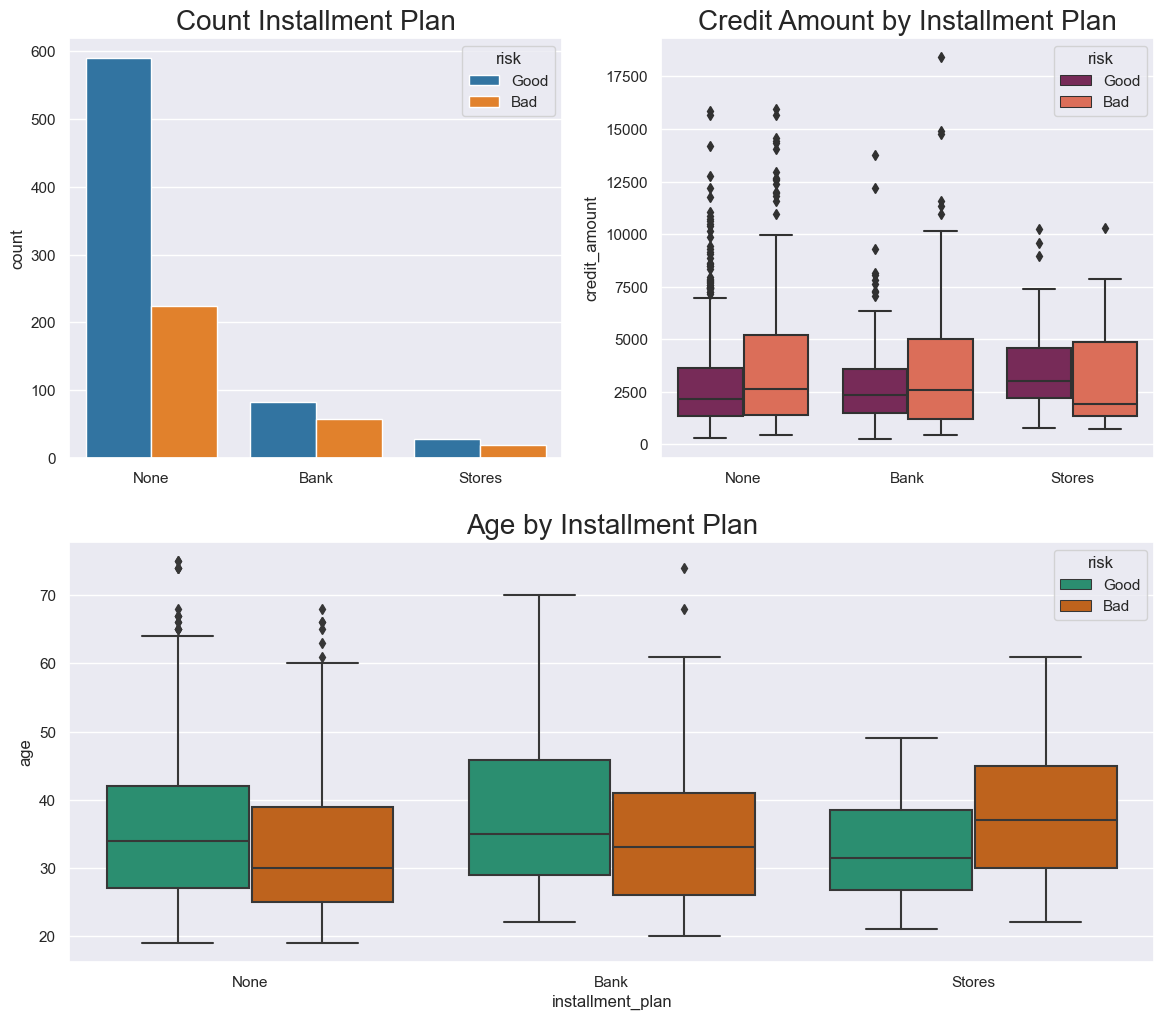

In [83]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='installment_plan', hue='risk', palette='tab10')
ax1.set_title("Count Installment Plan", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='installment_plan', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Installment Plan", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='installment_plan', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Installment Plan", fontsize=20)

plt.show()

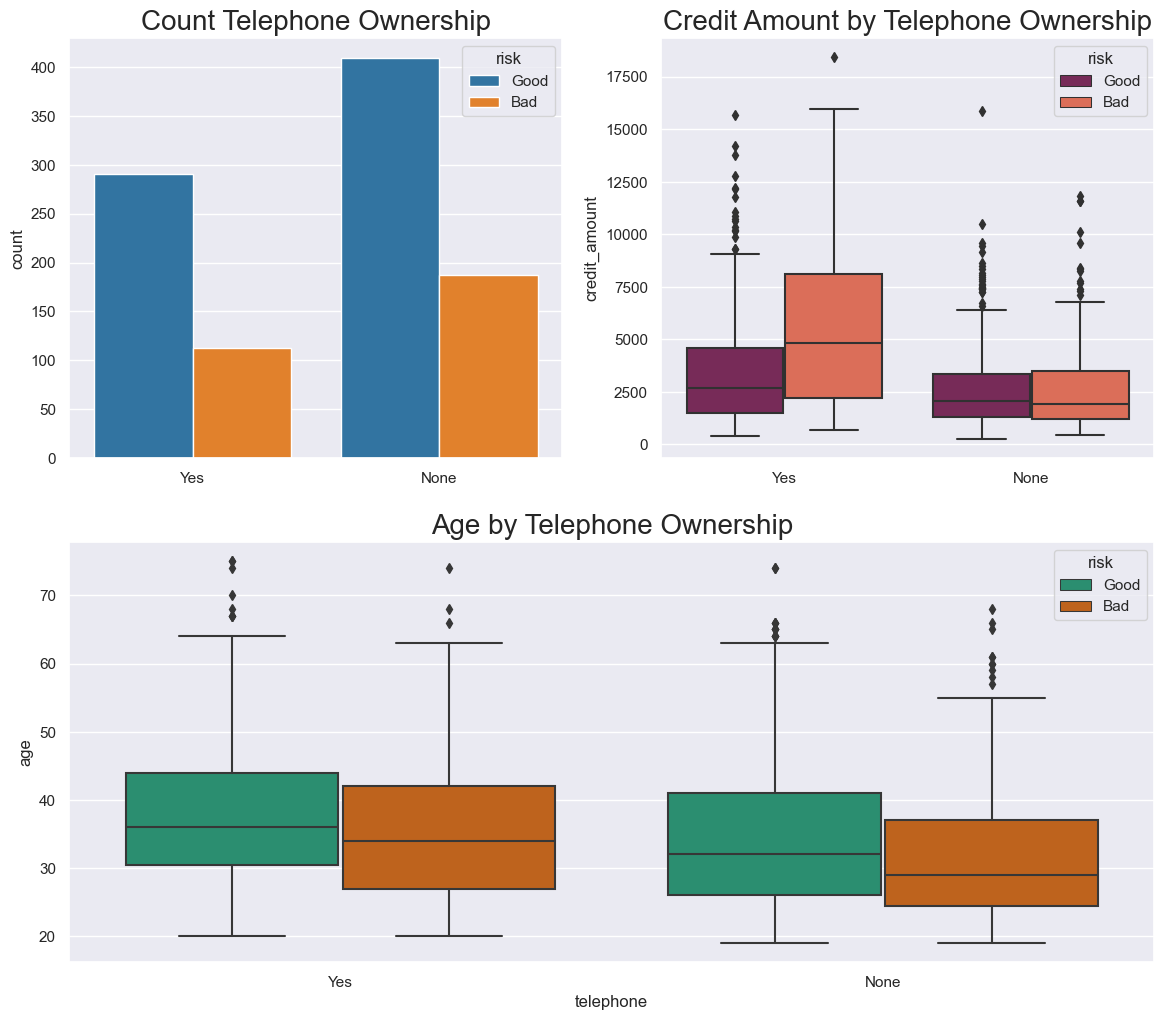

In [84]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='telephone', hue='risk', palette='tab10')
ax1.set_title("Count Telephone Ownership", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='telephone', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Telephone Ownership", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='telephone', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Telephone Ownership", fontsize=20)

plt.show()

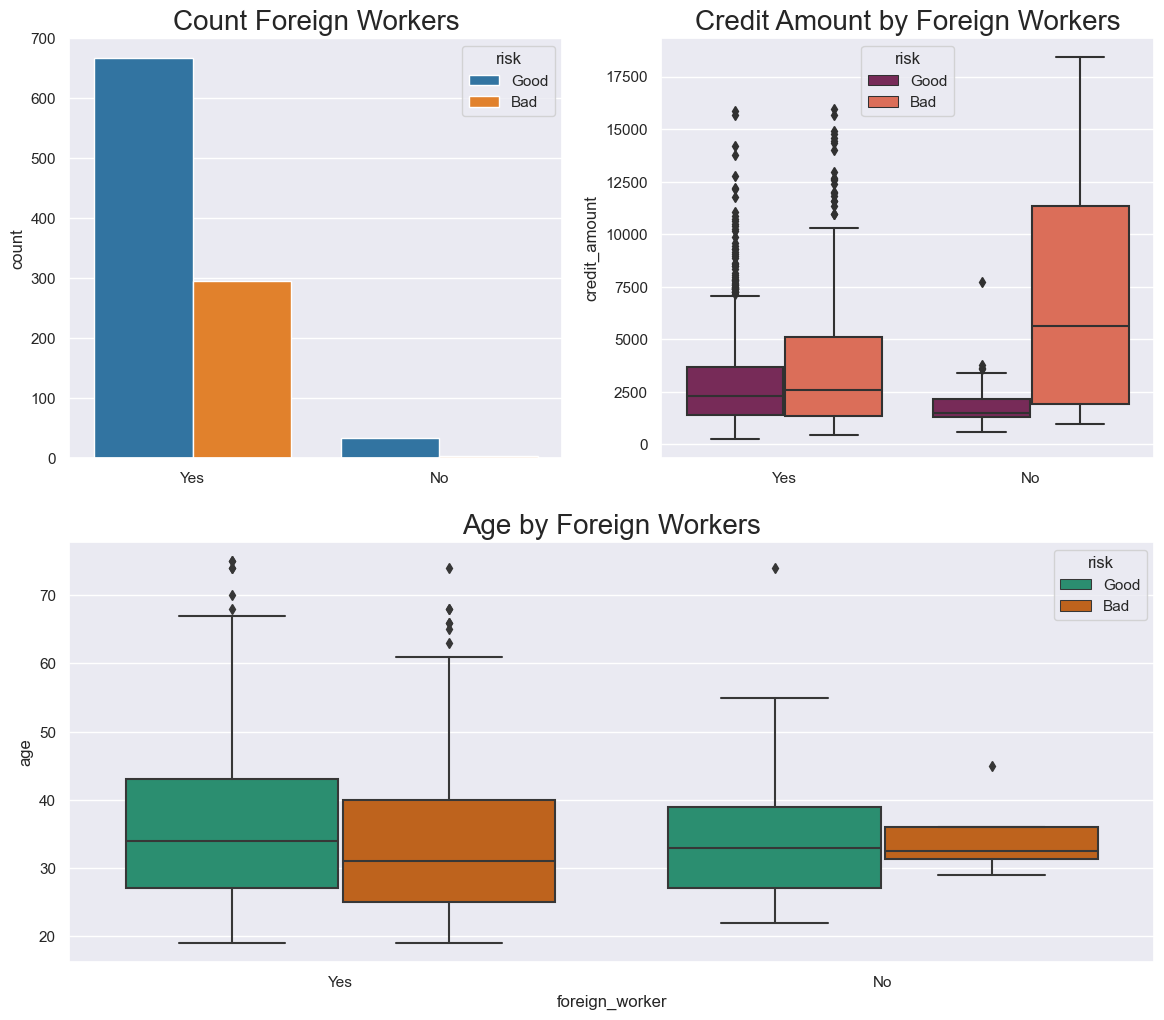

In [85]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='foreign_worker', hue='risk', palette='tab10')
ax1.set_title("Count Foreign Workers", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='foreign_worker', y='credit_amount', hue='risk', palette='rocket')
ax2.set_title("Credit Amount by Foreign Workers", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=df, x='foreign_worker', y='age', hue='risk', palette='Dark2')
ax3.set_title("Age by Foreign Workers", fontsize=20)

plt.show()